In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Load Data
data_df = pd.read_csv('Crop-Data.csv')
data_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#Descriptive Statistics
data_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


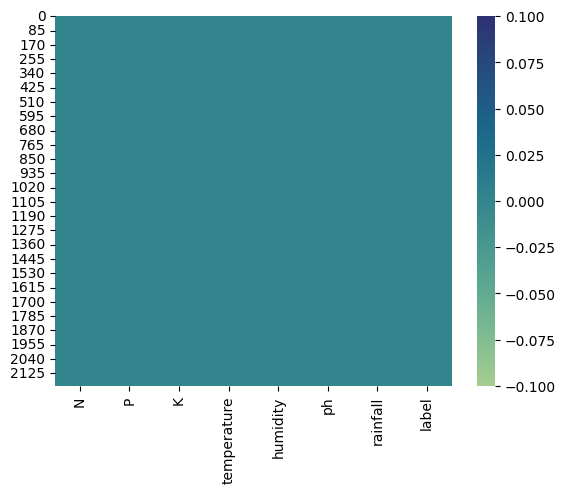

In [11]:
#Heatmap to identify missing values
sns.heatmap(data_df.isnull(), cmap="crest")
plt.show()

<AxesSubplot:xlabel='count', ylabel='label'>

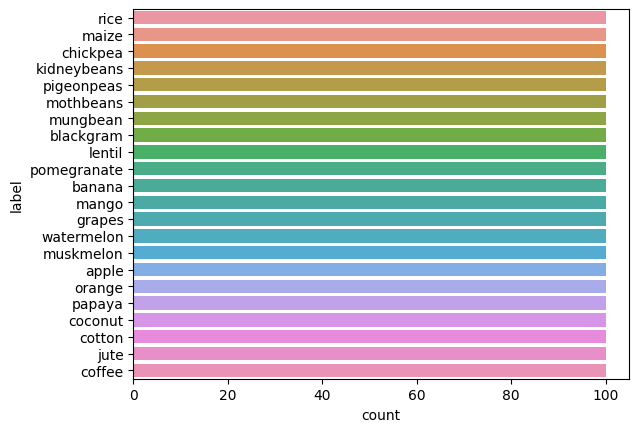

In [7]:
#Plot of the label count to identify inbalance
sns.countplot(y='label',data=data_df)

<AxesSubplot:>

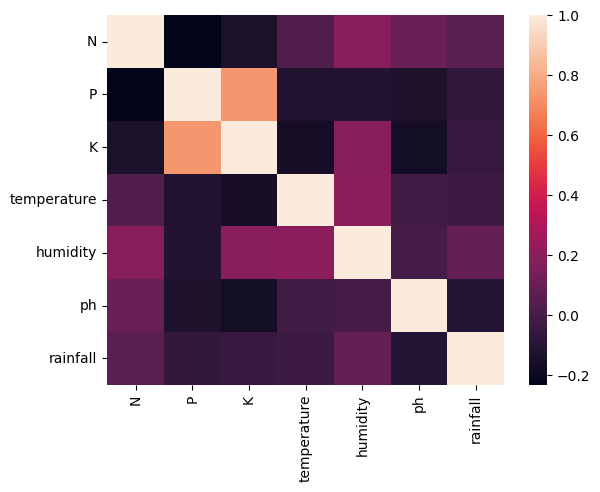

In [5]:
#Correlation Analysis
sns.heatmap(data_df[['N','P','K','temperature','humidity','ph','rainfall']].corr())

In [12]:
def preprocess(df):
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    return df

clean_df = preprocess(data_df)

train_df, test_df = train_test_split(clean_df, test_size=0.2, random_state=42)

train_df.to_csv('Train-Data.csv')
test_df.to_csv('Test-Data.csv')